This is code related to David MacKay's "Information Theory, Inference, and Learning Algorithms" book:
http://www.inference.org.uk/itila/book.html

In [3]:
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Lecture 1 https://www.youtube.com/watch?v=BCiZc0n6COY

In [4]:
def factorial(n):
    assert n >= 0
    if n == 0:
        return 1
    return n * factorial(n-1)

# Stirling approximation for factorial:
def stirling_factorial_approx(n):
    assert n >= 0
    return n**n * math.exp(-n) * math.sqrt(2 * math.pi * n)

In [5]:
stirling_factorial_approx(10), factorial(10)

(3598695.6187410364, 3628800)

In [6]:
# Calculating empirical mean and variance for the binomial distribution
def generate_binomial_sample(N, f):
    """
    n = number of coin tosses
    f = probability of heads
    
    Returns 1 for head, 0 
    """
    samples = np.random.rand(N)
    return [int(s< f) for s in samples]

In [7]:
"""
By definition:
MEAN[X] = SUM(P(x) * x | for all x in X)
VAR[X] = MEAN[(X - MEAN(X))^2]
"""

"""
Expanding VAR[X]:
VAR[X] = MEAN[(X - MEAN(X))^2] 
       = MEAN[X^2 - 2 * X * MEAN[X] + MEAN[X]^2]
       = MEAN[X^2] - MEAN[2 * X * MEAN[X]] + MEAN[MEAN[X]^2]
       = MEAN[X^2] - 2 * (MEAN[X]^2) + MEAN[X]^2
       = MEAN[X^2] - MEAN[X]^2
       
since MEAN[MEAN[X]] == MEAN[X]
"""

"""
For Binomial distribution in particular: since each of N coin flips is independent of each other, and f is prob heads, then:
MEAN[X] = SUM(P(x) * x) = N * (f * 1 + (1-f) * 0) = N * f
VAR[X] = MEAN[X^2] - MEAN[X]^2 = N * (f * 1^2 + (1-f) * 0^2) - N * f^2 = N * (f - f^2) = N * f * (1 - f) 
"""

'\nFor Binomial distribution in particular: since each of N coin flips is independent of each other, and f is prob heads, then:\nMEAN[X] = SUM(P(x) * x) = N * (f * 1 + (1-f) * 0) = N * f\nVAR[X] = MEAN[X^2] - MEAN[X]^2 = N * (f * 1^2 + (1-f) * 0^2) - N * f^2 = N * (f - f^2) = N * f * (1 - f) \n'

In [8]:
# repeat the test many times
distribution_for_num_heads = []
N = 10
f = 0.2
for i in range(1000):
    sample = generate_binomial_sample(N, f)
    distribution_for_num_heads.append(np.sum(sample))
print("empirical mean and variance:", np.mean(distribution_for_num_heads), np.var(distribution_for_num_heads))
print("theoretical mean and variance:", N*f, N*f*(1-f))

empirical mean and variance: 2.009 1.5509190000000002
theoretical mean and variance: 2.0 1.6


In [9]:
# Lecture 1, Q1 https://youtu.be/BCiZc0n6COY?t=12m23s
# Binary Symmetric Channel
# Given 10K bits, each with individual prob of flipping f = 0.1, independent of each other.
# How many bits will be flipped?
# Answer should be given in form:
#  ... +/- ...

# My reasoning: this is same as the binomial distribution problem, with N = 10000 and f = 0.1
# Mean = N * f = 1000
# Variance = N * f * (1-f)
# For giving answer in the required form, we should do: Mean +/ x * Stddev,
# where Stddev = sqrt(Variance)
# What should x be?
N = 10000 
f = 0.1
mean = N * f
stddev = math.sqrt(N * f * (1-f))

In [10]:
mean, stddev

(1000.0, 30.0)

In [11]:
distribution_for_num_heads = []
# This is SLOW for large sample sizes
for i in range(1000):
    sample = generate_binomial_sample(N, f)
    distribution_for_num_heads.append(np.sum(sample))

<function matplotlib.pyplot.show>

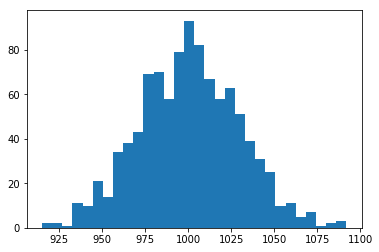

In [12]:
plt.hist(distribution_for_num_heads, bins=30)
plt.show

In [14]:
sample_size = 10000
num_stddev = 3
len([x for x in distribution_for_num_heads if (x >= (mean - num_stddev * stddev)) and ((x <= mean + num_stddev * stddev))]) * 1.0 / sample_size

0.0998

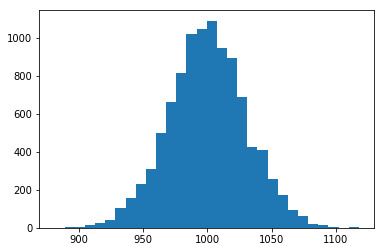

In [15]:
distribution_for_num_heads = np.random.binomial(N, f, sample_size)
plt.hist(distribution_for_num_heads, bins=30)
plt.show()

In [16]:
num_stddev = 3
len([x for x in distribution_for_num_heads if (x >= (mean - num_stddev * stddev)) and ((x <= mean + num_stddev * stddev))]) * 1.0 / sample_size

0.9973

In [17]:
mean - num_stddev * stddev, mean + num_stddev * stddev

(910.0, 1090.0)

In [18]:
# Course answer was: Mean +/- Stddev, or 1000 +/- 30 in this case

In [19]:
# Lecture 1, Q2 https://youtu.be/BCiZc0n6COY
# For a saleable 1GB HDD, what should f be?

# My reasoning: saleable = prob of one bit flip is "very low",
# such as "once in 1000 years low"

N = 10 ** 9 # 1GB
num_bits_flipped = 0.00001 # low chance of flipping even one bit
# Have to find f

In [20]:
# How to determine an acceptable flip rate?
# If we consider user writing the whole HDD once a day, choose num_bits_flipped so that it takes a long time until
# even one bit is flipped, maybe?
# For instance: with daily 1GB bits access, for 1000 years, makes for:
# 1000 * 300 * 10^9 = 3^14 ~ 10^15
# So it is as if N = 10 ** 15 and num_bits_flipped = 1
N = 10 ** 15
num_bits_flipped = 1

In [21]:
# num_bits_flipped: mean +/- stddev 
#
# num_bits_flipped >= N * f - N * f * (1-f)
# num_bits_flipped <= N * f + N * f * (1-f)

In [22]:
def try_f(f, N, histogram_sample_size=1000):
    mean = N * f
    stddev = math.sqrt(N * f * (1-f))
    print("mean: %s, stddev: %s" % (mean, stddev))
    print("interval:", mean - stddev, mean + stddev)
    print("does num_bits_flipped belong in interval (left, right):",
          num_bits_flipped >=mean - stddev, num_bits_flipped <= mean + stddev)

    sample_size = 1000
    distribution_for_num_heads = np.random.binomial(N, f, sample_size)
    plt.hist(distribution_for_num_heads, bins=30)
    plt.show()

mean: 0.01, stddev: 0.09999999949999999
interval: -0.0899999995 0.10999999949999999
does num_bits_flipped belong in interval (left, right): True False


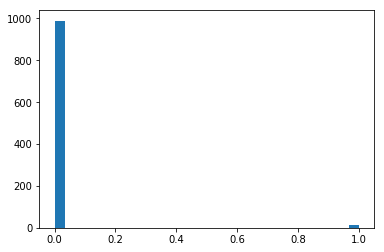

In [23]:
try_f(f=0.00000001, N = 10**6)

In [24]:
# After trial-and-error, f = 0.0000000001 (10^-10)  seems a good probabily of flip to shoot for

In [25]:
# Official solution: let's assume the user is using the HDD daily, and we want to optimize for 5 years of use
# (longer than most users keep their PC around for).
# N (number of bits written) = 5 years x 1GB
# 1GB = 8 * 10^9 bits
N = 5 * 365 * 8 * 10**9

In [26]:
N

14600000000000

In [27]:
try_f(f=10**-13, N=N)

mean: 1.46, stddev: 1.2083045973593967
interval: 0.2516954026406033 2.6683045973593966
does num_bits_flipped belong in interval (left, right): True True


OverflowError: Python int too large to convert to C long

In [28]:
# This assumes 1 error in 5 years is enough.
# If we want 1% "chance of disappointment", f=10^-13 turns into 10^-15
# And if we want it even lower, such as first 1000 customers are all happy: 10^-18

In [29]:
"""
Rules of probability:

1. product rule (by the definition of conditional probabilities)
P(s, r) = P(s) * P(r|s)

2. sum rule (marginal probabilities)
P(r) = SUM(P(r, s) | for all s)
"""

'\nRules of probability:\n\n1. product rule (by the definition of conditional probabilities)\nP(s, r) = P(s) * P(r|s)\n\n2. sum rule (marginal probabilities)\nP(r) = SUM(P(r, s) | for all s)\n'

In [30]:
"""
Inverse probability (can be derived from the rules above):

P(s|r) = P(r|s) * P(s) / P(r) = P(r|s) * P(s) / SUM(P(r, s) | for all s)
"""

'\nInverse probability (can be derived from the rules above):\n\nP(s|r) = P(r|s) * P(s) / P(r) = P(r|s) * P(s) / SUM(P(r, s) | for all s)\n'

In [31]:
# Lecture 1, Q3 https://youtu.be/BCiZc0n6COY
# We send a single bit s via a binary symmetric channel, with R3 replication, and using majority vote for decoding.
# What is the probability that the receiver gets the flipped bit?
# P(s_hat != s) = ?

In [32]:
# My reasoning:
# for receiver to get the wrong value, >=2 out of 3 must flip.
#
# Correct decoding <=1 out of 3 flips:
# (1-f)^3 + 3 * f * (1-f)^2
# >= 2 out of 3 flip is "one-minus" the above

In [33]:
f = 0.4
print("prob of receiving wrong data:", 1 - ((1-f)**3  + 3 * f * (1-f)**2))

prob of receiving wrong data: 0.352


In [34]:
# Official solution:
# P(s_hat != s) = P(3 flips) + P(2 flips) = f^3 + 3 * f^2 * (1-f)
# This is dominated by the 3*f^2 term (since f < 1)

In [35]:
# Lecture 1, homework 1 https://youtu.be/BCiZc0n6COY
# Assumming we use repetition codes (like we did above with repetition 3, R3): what is the repetition N needed,
# in order to deliver Pbit_error = 10^-15 (as in the problem for 1GB HDD with low error rates), for f=0.1?
# Hint: answer is about 61

In [36]:
# My reasoning: let's assume we send a single bit. With RN repetition, the probabilty of majority bits being flipped is:
# SUM(Binomial(r=i, f=10^-15, N) | i in [(N/2) +1 .. N])
# Not sure how to calculate the sum...

# Official solution: define the "dominant term" in the sum, as the one with (N+1)/2 flips, calculate for that one

In [37]:
f = 0.1
2 * math.log(10 ** -15) / math.log(4 * f * (1-f))

67.61363327915772

In [38]:
# Lecture 1, homework 2 https://youtu.be/BCiZc0n6COY
# Given 7,4 Hamming Code, find probability of error
# Hint: Pblock_error = 21 * f^2 + ... (using binomial distribution)
# Hint: Pbit_error = 9 * f^2 + ...

In [39]:
# Lecture 1, puzzle question: given 12 identical looking metal balls, only one of which is heavier or lighter than others.
# Given a balance, find the minimum number of weightings in order to find which ball is different, and also find whether it is 
# heavier or lighter than the others.

In [ ]:
# Lecture 2 https://www.youtube.com/watch?v=y5VdtQSqiAI

In [44]:
def h(p):
    """
    Shannon's "information content" for an event that has probability p
    The unit of measure of the returned value is in bits.
    """
    assert (p > 0 and p <= 1)
    return math.log(1.0/p, 2)

In [47]:
for p in [0.1, 0.5, 0.9, 1.0]:
    print ("p=%s, h=%s" % (p, h(p)))

p=0.1, h=3.3219280948873626
p=0.5, h=1.0
p=0.9, h=0.15200309344505006
p=1.0, h=0.0


In [48]:
# By definition, the Entropy of a distribution X is
# the expectation of h(X):
# H(X) = E[h(X)]

In [101]:
def H(X):
    """
    Information Entropy for a discrete distribution
    """
    assert type(X) == list
    assert abs(sum(X) - 1.0) < 0.00001
    result = 0
    for p in X:
        if p > 0:
            result += p * h(p)
    return result

In [102]:
H([0.1, 0.1, 0.1, 0.7])

1.3567796494470397

In [103]:
H([0.1] * 10)

3.3219280948873635

In [104]:
H([0.25] * 4)

2.0

In [105]:
H([0.2] * 5)

2.321928094887362

In [106]:
H([0.5, 0.5])

1.0

In [107]:
H([1.0])

0.0

In [108]:
# Discussion of the puzzle question from Lecture 1: given 12 identical looking metal balls, only one of which is heavier or lighter than others.
# Given a balance, find the minimum number of weightings in order to find which ball is different, and also find whether it is 
# heavier or lighter than the others.

My reasoning: if we only have 2 balls, we cannot know which ball is wrong: lighter or heavier one.
With 3 balls, we need two measurements
With 9 balls, we split in 3 groups of 3; we need 2 measurments to find the group of 3 containing the odd ball; then 2 more (like above) to find the odd ball (and which way it is odd: heavier or lighter).

For 12 balls:
- if we start with 4 groups of 3: we need 3 measurements to identify the group of 3 with odd ball; then 2 more, total 5
- if we start with 3 groups of 4: we need 2 measurements to identify the group of 4 with odd ball; 2 more to find the odd ball, total 4.

Just realized that given 4 balls, with 2 measurements we can identify the odd one! Better than above, where I started with group of 3.


In [109]:
"""
Hint: use Shannon's information gain; maximize the entropy of the first weighing!
"""
# 6 vs 6 balls
# There is only one event possible, with prob 1: since the odd ball is on the balance (we just don't know on which arm),
# the fact that the balance will show different weights.
H([12/12])

0.0

In [110]:
# 3 vs 3 balls (6 on the side)
# There are two possible events, with probability 1/2 each: either the odd ball is within the 6 balls in the balance,
# in which case the balance will show different weights, or the odd ball is in the 6 balls on the side, in which case
# the balance will show equal weights.
H([6/12, 6/12])

1.0

In [111]:
# 1 vs 1 ball (10 on the side)
H([2/12, 10/12])

0.6500224216483541

In [112]:
# 4 vs 4 balls (4 on the side)
H([8/12, 4/12])

0.9182958340544896

In [113]:
# 2 vs 2 balls (8 on the side)
H([4/12, 8/12])

0.9182958340544896

In [120]:
# Turns out that Prof's way to measure is different: https://youtu.be/y5VdtQSqiAI?t=24m19s
# States of the balance (our "alphabet"): 
# 1 L < R
# 2 L = R
# 3 L > R

# For 6 vs 6, the probabilities of the 3 states are:
# 1/2, 0, 1/2
H([1/2, 0, 1/2])

1.0

In [121]:
# 3 vs 3
H([1/4, 1/2, 1/4])

1.5

In [122]:
# 1 vs 1
# Q: HOW can this be worse than 6-vs-6 which gives us no useful info at all??
H([1/12, 10/12, 1/12])

0.8166890883150209

In [123]:
# 4 vs 4
H([4/12, 4/12, 4/12])

1.584962500721156

In [124]:
# 5 vs 5
H([5/12, 2/12, 5/12])

1.4833557549816874

In [125]:
# Lecture question: what probability distrubutions maximize entropy?

# I think: the more uniform, the higher the entropy
H([1/3, 1/3, 1/3])

1.584962500721156

In [126]:
H([1/10, 1/10, 8/10])

0.9219280948873625

In [ ]:
# Source coding theorem: given N outcomes from a source X, they can be compressed in roughly N * H(X) bits
# (where H(X) is the entropy of X)

In [127]:
# Game 63: minimize the number of yes/no questions asked to guess an integer number between 0 and 63

# if we ask "is it x" kind of question, the entropy is 0.116:
H([1/64, 63/64])

0.11611507530476964

In [128]:
# if we ask "is it >= 31?", the entropy is better, 1.0, so we gain more information on the average:
H([1/2, 1/2])

1.0

In [ ]:
# Lecture question https://youtu.be/0SxJl5G2bp0?t=11m3s
# If we have S items, and want to give each a unique binary name, how many bits long are the names?

# My answer: log_2(S)

In [ ]:
# Prof answer: ceil(log_2(S)) (rounding up a bit in case S is not a power of 2)

In [ ]:
# Lottery Ticket (Mafia Boss) problem

![title](img/lottery_ticket_mafia_boss_problem.png)

In [133]:
# If we only buy one tickat: all zeros is the one most probable

# What tickets do we need to buy, to have 99% chance (at minimum # tickets)?
# We want to buy the all-zeros ticket, the 1000 only-one tickets, etc... (up to only-X-ones tickets); what is the value of X?
# Distribution of 1s in the ticket digits is Binomial(N=1000, f=0.1)
# mean = Nf = 1000 * 0.1 = 100
# variance = N * f * (1-f) = 90 ~ 100
# stddev = sqrt(variance) ~ 10
# If we buy tickets with up to 100 1s, we have about 50% chance; maybe we go 2 std-deviations up from the mean:
# mean + 2 * stddev = 120
#
# For a Normal distribution: 2 stddevs give us ~ 95% probability mass
# We already have the left tail (from buying all 0-1s, 1-1, 2-1s, .., etc) - that is 5%/2 = 2.5%, for a total of 97.5%
# we need to go a little up from 2 stddevs, but we'are in the right ballpark. Correct value of X: 123 (since for 99% we need 2.3 * stddev)
#
# How to find K, so that 2^K is the number of tickets?
# We buy 1 + 1000 + 1000-choose-2 + ... + 1000-choose-123
# Hard to calculate, but we can approximate, based on the dominant term

# Eaiser: what is 1000-choose-100?
# My idea: 1000! / (100! * 900!) ~ 1000^100 ~ (2^10)^100... nah....
# Try Stirling:
# N-choose-r ~ 2^(N * H2(r/N), where
# H2(x) is binary entropy function = x * log(1/x) + (1-x) * log(1/(1-x))
# 1000-choose-100 ~ 2^469, because:
# H2(0.1) = 0.4689
1000 * H([0.1, 0.9])

468.9955935892813

In [134]:
# Stirling approximation for 1000-choose-123: 2^538
1000 * H([123/1000, (1000-123)/1000])

537.9232310513298

In [ ]:
# In general, lottery with N num bits and prob 1s f, for 99% chance of winning:
1 + N + ... + N-choose-(N*f + 2.3 * sqrt(N * f * (1-f))) ~ 2 ^ N * H2(f)

In [ ]:
# Basically, we showed we can compresss data, with high-probability (99% in this case; we could make that 99.9% or higher,
# by choosing a larger number of "tickets", say from ~ 2^530 to "little more", increasing by sqrt(N))
# Compression rate: from N down to N * H2(f) bits

In [135]:
# Source Coding Theorem: N outcomes from a source X can be compressed into roughly N*H(X) bits

# Full proof in the book, based on "typical set" (defined as mean +/- a few standard deviations)

In [ ]:
# ???
# My Q: does it mean that N*H(X) is always compressing the input (reducing in size)?
# N distinct outcomes can be coded in 2^log(N) bits.. how does it related to N*H(X) bits?
# ???

In [ ]:
# Lecture 3 HW: given a source file with 10^4 bits, each with probabilty 0.01 of being set, design & implement
# a compressor and decompressor, measure how well they work.

![title](img/after_lecture_4.png)

![title](img/hw_lectue_5.png)

![title](img/reminder_exercises_after_lectue_5.png)

In [ ]:
"""
Ax = {a, b, c, d}
Px = {1/2, 1/4, 1/8, 1/8}
C = {0, 10, 110, 111}

What is p1 (prob of a random bit from a stream from Ax, encoded with C, to be 1):
a) < 1/2
b) 1/2
c) > 1/2
"""

In [ ]:
"""
Let's try first to calculate empirically
a ~ 0  1/2 chance: no 1 at all: 0 chance of a 1
b ~ 10 1/4 chance; 1 is 1/2 of 1/4, or 1/8 chance of a 1 (from b)
c ~ 110 1/8 chance; 2/3 of 110 are 1s, so 1/8 * 2/3 = 1/12 chance of a 1 (from c) - maybe 2/12 == 1/6?
d ~ 111 1/8 chance, all 3 ones: 1/8 chance of a 1 (but 3 such chances...) - maybe 3/8?

Now, we need to take into account the number of 0s and 1s in an encoded stream too.
Example stream:
aaaabbcd
Encoded:
00001010110111
Number of 0s: 7
Number of 1s: 7
"""

![title](img/joint_entropy.png)